In [10]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import numpy

In [11]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

In [25]:
total_width = 0
total_height = 0
count = 1
folder_path = '/Users/sarthakkapila/Desktop/Untitled Folder/archive/train'

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        
        with Image.open(filepath) as img:
            width, height = img.size
            total_width += width
            total_height += height
            count += 1 
            
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        filepath = os.path.join(folder_path, filename)
        
        with Image.open(filepath) as img:
            width, height = img.size
            total_width += width
            total_height += height
            count += 1 
                      
average_width = total_width / count
average_height = total_height / count


int(average_height), int(average_width), count-1

(1808, 1165, 147)

In [15]:
# Transforming and converting to a tensor

transform = transforms.Compose([
    transforms.Resize((int(average_height), int(average_width))),
    transforms.ToTensor(), 
])

dataset = torchvision.datasets.ImageFolder(root='/Users/sarthakkapila/Desktop/Untitled Folder/archive', transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=32, 
                                         shuffle=True)


In [16]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

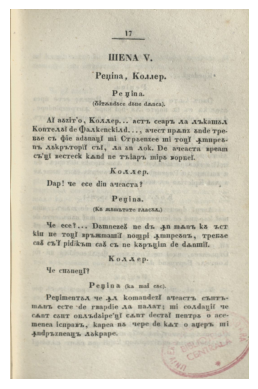

In [17]:
images, labels = next(iter(dataloader))
imshow(images[0]);

In [24]:
for images, labels in dataloader:                 # Dataloader is a list with images and labels tensors
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 3, 1808, 1165])
torch.Size([32])


In [ ]:
# Architecture

# Input layer: 1 layer                                   - (1808, 1165, 3)
# Convolutional layer with ReLU activation: 1 layer      - (5,5)/(7,7) x (16)/(32)/(64)... Need to experiment
# Max pooling layer: 1 layer                             - (2,2)
# Convolutional layer with Sigmoid activation: 1 layer   - (5,5)/(7,7) x (32)/(64)... Need to experiment
# Max pooling layer: 1 layer                             - (2,2)
# Flatten layer: 1 layer                                 - No idea :/
# Dense layer: 1 layer                                   - Linear layer

In [29]:
channels = 3
input_tensor = (int(average_height), int(average_width), channels)
input_tensor = torch.tensor(input_tensor)
kernel1 = (5,5,16)
kernel2 = (5,5,32)
kernel_pool = (2,2)                              # Depth will remain same
n_linear = 2048                                  

model = nn.Sequential(
    
            nn.Conv2d(in_channels=channels, out_channels=kernel1[2], kernel_size=kernel1[:2], stride=1, padding=0, bias=True),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=kernel_pool, stride=1, padding=0, return_indices=False, ceil_mode=False)
#           nn.Conv2d(20,64,5),
#           nn.ReLU()
)